In [1]:
import numpy as np    # for linear algebra
import pandas as pd   # for data processing; Created by Wes McKinney at AQR (hedge fund)

import os
# return csv file path given SYMBOL
def symbol_to_path(symbol, base_dir='StockData'):
    return os.path.join(base_dir, '{}.csv'.format(str(symbol)))

# Get data from several csv files
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                              usecols=['Date', 'Adj Close'], na_values=['nan'])    # NaN: Not a Number
        df_temp = df_temp.rename(columns={'Adj Close' : symbol})
        df = df.join(df_temp, how='left')
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [2]:
# Download data to csv files
from pandas_datareader.data import DataReader

symbols = ['GS', 'AAPL', 'GOOG','IBM','GLD']
SOURCE = 'yahoo'

import datetime
start_date = datetime.date(2016, 1, 1)
end_date   = datetime.date.today()

if 'SPY' not in symbols:
    symbols.insert(0, 'SPY')

for symbol in symbols:
    DataReader(symbol, SOURCE, start_date, end_date).to_csv(symbol_to_path(symbol))

df = get_data(symbols, pd.date_range(start_date, end_date))
df.tail()

,SPY,GS,AAPL,GOOG,IBM,GLD
2017-03-20,236.770004,242.139999,141.460007,848.400024,175.699997,117.510002
2017-03-21,233.729996,233.000000,139.839996,830.460022,173.880005,118.540001
2017-03-22,234.279999,231.070007,141.419998,829.590027,174.779999,118.830002
2017-03-23,234.029999,231.899994,140.919998,817.580017,174.820007,118.669998
2017-03-24,233.860001,228.410004,140.639999,814.429993,173.830002,118.860001


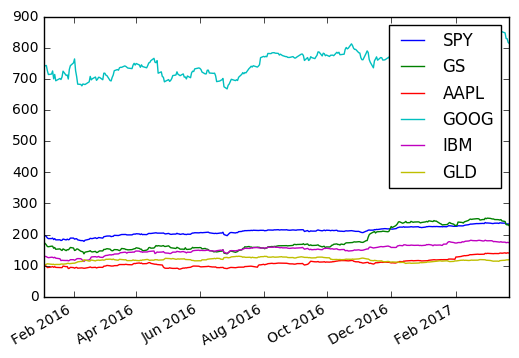

In [3]:
import matplotlib.pyplot as plt

df[symbols].plot()
plt.show()